Exponent = 0.674942583876 +/- 0.0546567571611
Vorfaktor = 1.16972444312 +/- 0.217147169527
Exponent f= 0.504280676761 +/- 0.0428648337044
Vorfaktor f= 2.09982426086 +/- 0.329940633827
[  140   150   180   220  1000 10000]
Plateau =  18.2485796575 +/- 0.0733252781415
Plateau 3-db =  12.9036944229 +/- 0.0518488014062


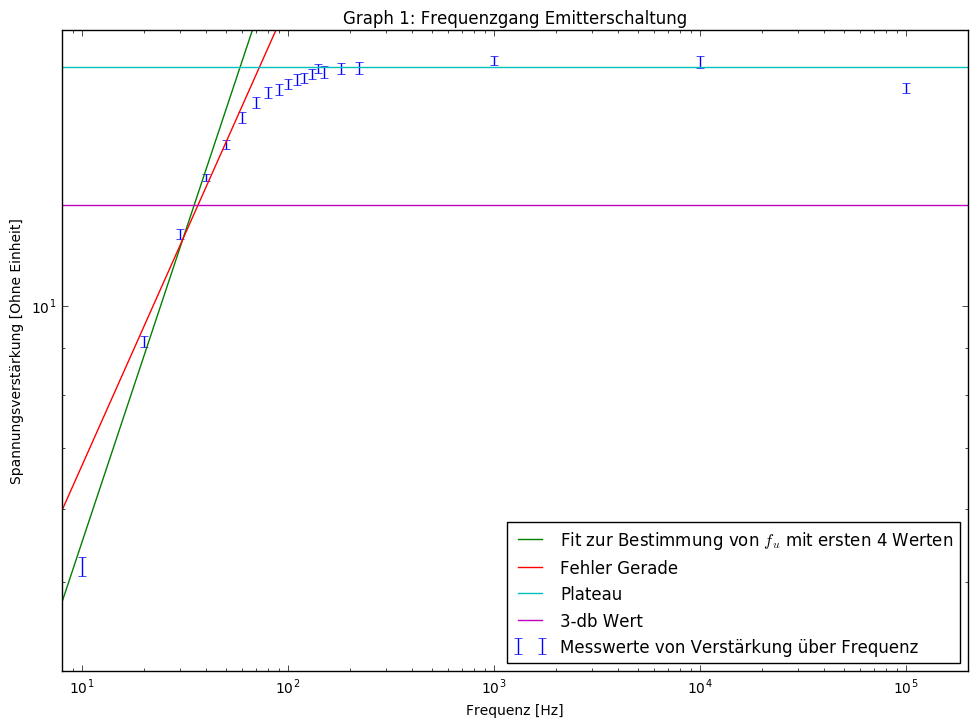

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Emitterschaltung

def constant(c,x):
    return c
def expon(x,a,b):
    return b*x**a


f = np.array([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,180,220,1000,10000,100000])
V1 = np.array([93.2,108,111,113,114,114,114,114,115,115,115,115,115,114,115,115,116,115,116,114])
V1_f = np.array([1,1.1,1,1,1.1,1,1,1,1,1,1.2,1.3,1,1,1.4,1.2,1.2,1,1.3,1.1])
V2 = np.array([485,988,1330,1560,1710,1830,1900,1950,1980,2010,2030,2040,2060,2070,2070,2090,2110,2130,2140,1970])
V2_f = np.array([10,10,10,5,11,18,19,19,20,17,18,10,20,16,16,18,22,18,20,15])
xw=np.linspace(0,500,50000)
V=V2/V1
V_f=np.sqrt((V2_f/V1)**2+(V1_f*V2/V1**2)**2)

plt.xscale('log')
plt.yscale('log')
plt.xlim(8,200000)
plt.ylim(4,20)
plt.errorbar(f,V,yerr=V_f,fmt='none',label="Messwerte von Verstärkung über Frequenz")

popt, pcov = curve_fit(expon,f[0:4],V[0:4],sigma=V_f[0:4])
plt.plot(xw,expon(xw,*popt),label="Fit zur Bestimmung von $f_u$ mit ersten 4 Werten")
fehler1 = np.sqrt(pcov[0][0])
fehler2 = np.sqrt(pcov[1][1])
print("Exponent =",popt[0],"+/-",fehler1)
print("Vorfaktor =",popt[1],"+/-",fehler2)

popt, pcov = curve_fit(expon,f[1:6],V[1:6],sigma=V_f[1:6])
plt.plot(xw,expon(xw,*popt),label="Fehler Gerade")
fehler1 = np.sqrt(pcov[0][0])
fehler2 = np.sqrt(pcov[1][1])
print("Exponent f=",popt[0],"+/-",fehler1)
print("Vorfaktor f=",popt[1],"+/-",fehler2)

plat=np.mean(V[13:19])
plat_f=np.std(V[13:19])/np.sqrt(6)
print(f[13:19])
print("Plateau = ",plat,"+/-",plat_f)
xc=np.array([0,200000])
yc=np.array([plat,plat])
plt.plot(xc,yc,label="Plateau")
plat2=1/np.sqrt(2)*plat
plat2_f=1/np.sqrt(2)*plat_f
yc2=np.array([plat2,plat2])
print("Plateau 3-db = ",plat2,"+/-",plat2_f)
plt.plot(xc,yc2,label="3-db Wert")

plt.legend(loc=4)
plt.xlabel("Frequenz [Hz]")
plt.ylabel("Spannungsverstärkung [Ohne Einheit]")
plt.title('Graph 1: Frequenzgang Emitterschaltung')
plt.gcf().set_size_inches(11.69, 8.27)

In [45]:
?np.log